# DATA SCIENCE PROJECT - Supervised Machine Learning
## Antoine GOULARD - Reda FALAKI - Capucine FOUCHER

### Importing libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from scipy.stats import spearmanr


### Step 1 - Load the cleaned data

In [99]:
X = pd.read_csv('data/valeursfoncieres-2022.csv')
y = pd.read_csv('data/valeursfoncieres-2022-target.csv')

### Step 2 - Split the data into training and testing sets

In [100]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 3 - Choose a regression algorithm and create an instance of the algorithm with desired parameters:

In [101]:
# Initialize the linear regression model
LinearRegression = LinearRegression()
# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

### Step 4 - Fit the model to the training data:


In [102]:
# Train the model on the training set
LinearRegression.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

/var/folders/f6/zj0sqhqs6plbyp5r0kckp5340000gn/T/ipykernel_19363/321232292.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Step 5 - Make predictions on the test data

In [103]:
# Make predictions on the test set
predictions_LR = LinearRegression.predict(X_test)
predictions_RF = rf_regressor.predict(X_test)

### Step 6 - Evaluate the model's performance

In [104]:
# Evaluate the model Linear Regression
spearmanr_LR = spearmanr(y_test, predictions_LR)
mse_LR = mean_squared_error(y_test, predictions_LR)
rmse_LR = np.sqrt(mse_LR)
mae_LR = mean_absolute_error(y_test, predictions_LR)
r2_LR = r2_score(y_test, predictions_LR)

# Evaluate the model Random Forest
spearmanr_RF = spearmanr(y_test, predictions_RF)
mse_RF = mean_squared_error(y_test, predictions_RF)
rmse_RF = np.sqrt(mse_RF)
mae_RF = mean_absolute_error(y_test, predictions_RF)
r2_RF = r2_score(y_test, predictions_RF)

In [113]:
# Print the evaluation metrics
print("Spearman Rank Correlation Coefficient:", spearmanr_LR)
print("Mean Squared Error:", mse_LR)
print("Root Mean Squared Error:", rmse_LR)
print("Mean Absolute Error:", mae_LR)
print("R^2 Score:", r2_LR)

# Print the evaluation metrics
print("Spearman Rank Correlation Coefficient:", spearmanr_RF)
print("Mean Squared Error:", mse_RF)
print("Root Mean Squared Error:", rmse_RF)
print("Mean Absolute Error:", mae_RF)
print("R^2 Score:", r2_RF)

Spearman Rank Correlation Coefficient: SignificanceResult(statistic=0.18403000597856703, pvalue=1.0778825960133202e-16)
Mean Squared Error: 202963450769412.97
Root Mean Squared Error: 14246524.164490543
Mean Absolute Error: 1219706.45671
R^2 Score: 0.006983617582953516
Spearman Rank Correlation Coefficient: SignificanceResult(statistic=0.4747504068618977, pvalue=5.882265134519971e-113)
Mean Squared Error: 190361774309885.47
Root Mean Squared Error: 13797165.444752973
Mean Absolute Error: 994805.7999527786
R^2 Score: 0.06863841859659436


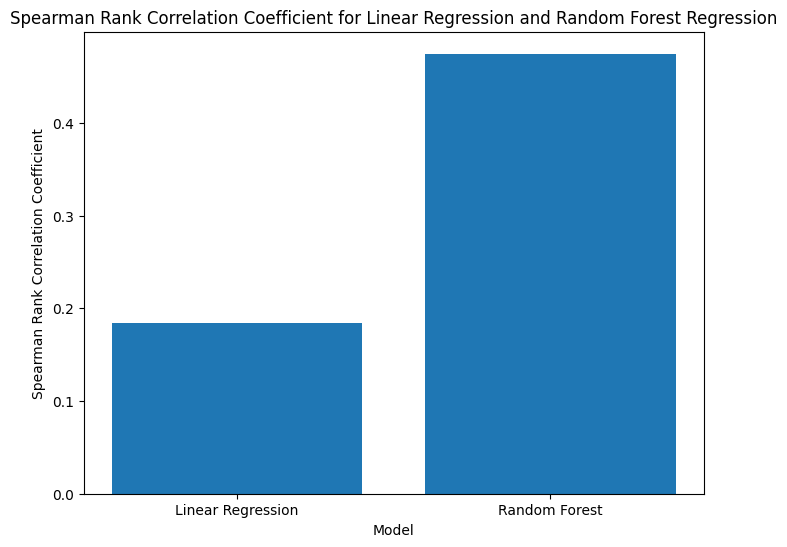

In [114]:
# plot the spearman rank correlation coefficient
plt.figure(figsize=(8, 6))
plt.bar(['Linear Regression', 'Random Forest'], [spearmanr_LR[0], spearmanr_RF[0]])
plt.xlabel('Model')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.title('Spearman Rank Correlation Coefficient for Linear Regression and Random Forest Regression')
plt.show()

#### Step 7 - Results

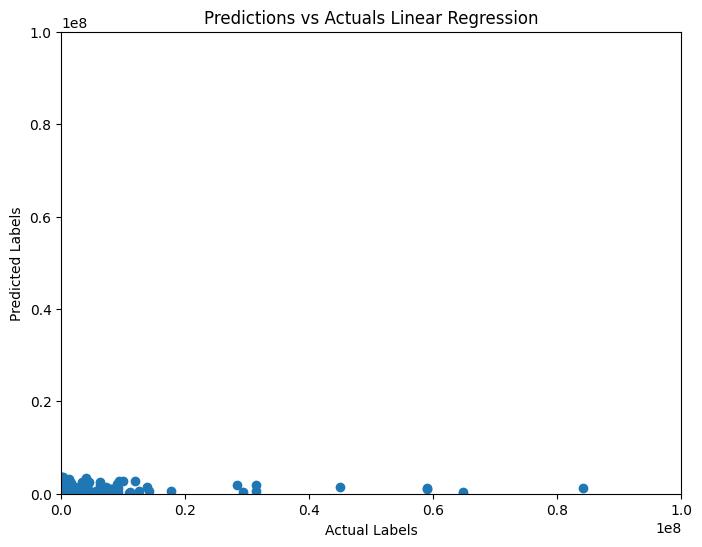

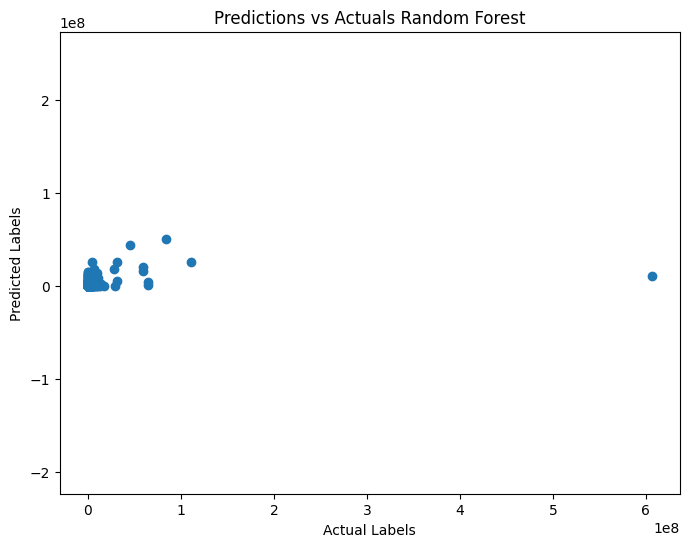

In [129]:
# Plot the predictions vs the actual values as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_LR)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals Linear Regression')
plt.ylim([0, 100000000])
plt.xlim([0, 100000000])
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_RF)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals Random Forest')
plt.axis('equal')
plt.show()

### Step 8 - Choice of the most effiecient model

In [108]:
best_predictions = predictions_RF

### Step 9 - Save the prediction results to a csv file

In [109]:
best_predictions.to_csv('predictions.csv', index=False)

AttributeError: 'list' object has no attribute 'to_csv'